<a href="https://colab.research.google.com/github/tomonari-masada/course2021-stats2/blob/main/05_divergent_transitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. „Çµ„É≥„Éó„É™„É≥„Ç∞„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑÂ†¥Âêà„ÅÆ‰æã
* ÂØÜÂ∫¶Èñ¢Êï∞„ÅåÈùûÂ∏∏„Å´peaky„Åß„ÅÇ„Çã„Å®„Åç„ÄÅ„Çµ„É≥„Éó„É™„É≥„Ç∞„Åå‰∏äÊâã„Åè„ÅÑ„Åã„Å™„ÅÑ„Åì„Å®„Åå„ÅÇ„Çã„ÄÇ
 * peaky„Å´„Å™„Å£„Å¶„ÅÑ„ÇãÈÉ®ÂàÜ„Åå„ÄÅ„Çµ„É≥„Éó„É™„É≥„Ç∞„Å´„Çà„Å£„Å¶ÂÖ®„Åè„Ç´„Éê„Éº„Åï„Çå„Å™„Åã„Å£„Åü„Çä„Åô„Çã„ÄÇ
* „Åì„ÅÆÂ†¥Âêà„ÄÅreparameterization„Çí‰Ωø„ÅÜ„Å®„ÄÅÂïèÈ°å„ÅåËß£Ê±∫„Åô„Çã„Åì„Å®„Åå„ÅÇ„Çã„ÄÇ
 * https://mc-stan.org/docs/2_26/stan-users-guide/reparameterization-section.html

## 5.0 Ê∫ñÂÇô

In [2]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pymc3 as pm

warnings.simplefilter(action="ignore", category=FutureWarning)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

SEED = 20210328

## 5.1 „Çµ„É≥„Éó„É™„É≥„Ç∞„Åå„ÅÜ„Åæ„ÅèË°å„Åã„Å™„ÅÑÁêÜÁî±
* ÂèÇËÄÉË≥áÊñô
 * https://mc-stan.org/docs/2_26/reference-manual/divergent-transitions.html
* HMC„ÅØ„ÄÅÂãæÈÖç„Çí‰Ωø„Å£„Å¶first-order„ÅÆËøë‰ºº„ÇíË°å„Å£„Å¶„ÅÑ„Çã„Åü„ÇÅ„ÄÅ"Âú∞ÂΩ¢„ÅåÊÄ•Â≥ª„Å™"Â†¥ÊâÄ„Åß„ÅØ„ÄÅÊú¨ÂΩì„Å´Ê±Ç„ÇÅ„Åü„ÅÑ„ÇÇ„ÅÆ„Åã„ÇâÂ§ß„Åç„ÅèÂ§ñ„Çå„Å¶„Åó„Åæ„ÅÜ„Åì„Å®„Åå„ÅÇ„Çã„ÄÇ„Åô„Çã„Å®„ÄÅ„Çµ„É≥„Éó„É™„É≥„Ç∞„Åå„Éë„É©„É°„Éº„ÇøÁ©∫ÈñìÂÜÖ„Åß„ÅÆÂçò„Å™„Çã„É©„É≥„ÉÄ„É†„Ç¶„Ç©„Éº„ÇØ„Å´Ëøë„Åè„Å™„Å£„Å¶„Åó„Åæ„ÅÑ„ÄÅÂØÜÂ∫¶Èñ¢Êï∞„ÅÆ"ÊøÉÊ∑°"„ÇíÂèçÊò†„Åó„Å™„ÅÑ„ÇÇ„ÅÆ„Å´„Å™„Å£„Å¶„Åó„Åæ„ÅÜ„ÄÇ
 * Âà•„ÅÆÂèÇËÄÉË≥áÊñô https://norimune.net/3149

## 5.2 ‰æãÈ°å
* ‰∏ã„ÅÆ„Çà„ÅÜ„Å™Á¢∫ÁéáÂàÜÂ∏É„ÇíËÄÉ„Åà„Çã( https://mc-stan.org/docs/2_26/stan-users-guide/reparameterization-section.html )„ÄÇ
$$\begin{align} 
y & \sim N(0, 3^2) \\
x_i & \sim N(0, e^y), \text{ $i=1,\ldots, 9$ }  
\end{align}$$


* ÂêåÊôÇÂàÜÂ∏É„ÇíÂºè„ÅßÊõ∏„Åè„Å®„Éª„Éª„Éª
$$p(y, x_1, \ldots, x_9) = p(y) \prod_{i=1}^9 p(x_i | y)$$
where
$$ p(y) = \frac{1}{\sqrt{2\pi 3^2}} \exp\bigg( - \frac{y^2}{2 \times 3^2}\bigg)  $$
and
$$ p(x_i | y) = \frac{1}{\sqrt{2\pi e^y}} \exp\bigg( - \frac{x_i^2}{2e^y} \bigg) $$

* „Åì„ÅÆÂàÜÂ∏É„ÅÆÂïèÈ°åÁÇπ
 * $y$„ÅÆÂÄ§„ÅåÂ∞è„Åï„ÅÑ„Å®„Åç„ÄÅ$x_i$„ÅåÂæì„ÅÜÊ≠£Ë¶èÂàÜÂ∏É„ÅåÈùûÂ∏∏„Å´peaky„Å™ÂØÜÂ∫¶Èñ¢Êï∞„ÇíÊåÅ„Å§„Åì„Å®„Å´„Å™„Çä„ÄÅ„Çµ„É≥„Éó„É™„É≥„Ç∞„ÅåÂõ∞Èõ£„Å´„Å™„Çã„ÄÇ

* ‰ªäÂõû„ÅØ„ÄÅ„Åì„ÅÆÂàÜÂ∏É„Åã„Çâ„Çµ„É≥„Éó„É™„É≥„Ç∞„Åô„Çã„ÄÇÔºà„Å§„Åæ„Çä„ÄÅ„Åì„ÅÆÂàÜÂ∏É„Å´Âæì„ÅÜ‰π±Êï∞„ÇíÁô∫Áîü„Åï„Åõ„Çã„ÄÇÔºâ
 * „Å§„Åæ„Çä„ÄÅ‰ªäÊó•„ÅØ„Éô„Ç§„Ç∫„ÅÆË©±„Çí„Åô„Çã„ÅÆ„Åß„ÅØ„Å™„Åè„Éª„Éª„Éª
 * NUTS„Çµ„É≥„Éó„É©„Éº„Åß„ÇÇ„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑÂ†¥Âêà„Åå„Å©„Çì„Å™Â†¥Âêà„Åã„Çí„ÄÅÂçò„Å´Ë™¨Êòé„Åô„Çã„ÄÇ

### 5.2.1 ÂÆüË£ÖÊñπÊ≥ï (1)
* „Åì„Çå„ÅØÊÇ™„ÅÑÂÆüË£ÖÊñπÊ≥ï„ÄÇ
 * divergent transition„ÅåÁô∫Áîü„Åô„Çã„ÄÇ
 * „Åï„Çâ„Å´„ÄÅÂë®Ëæ∫ÂàÜÂ∏É$p(y)$„ÅØÊ≠£Ë¶èÂàÜÂ∏É„Å®„Å™„Çã„ÅØ„Åö„Å™„ÅÆ„Å´„ÄÅ„Éí„Çπ„Éà„Ç∞„É©„É†„ÅåÂÖ®„ÅèÊ≠£Ë¶èÂàÜÂ∏É„ÅÆÂΩ¢„Å´„Å™„Çâ„Å™„ÅÑ„ÄÇ

In [3]:
with pm.Model() as model:
  y = pm.Normal("y", mu=0, sd=3)
  x = pm.Normal("x", mu=0, sd=(y/2).exp(), shape=9)

* „ÄÄ‰ªäÂõû„ÅØ„ÄÅ`return_inferencedata=True`„Å®Ë®≠ÂÆö„Åõ„Åö„ÄÅarvizÂêë„Åë„Åß„ÅØ„Å™„ÅÑÂΩ¢Âºè„ÄÅÂÖÉ„ÅÆPyMC3„ÅÆÂΩ¢Âºè„Åß„ÄÅ„Çµ„É≥„Éó„É™„É≥„Ç∞ÁµêÊûú„ÇíÂæó„Çã
 * arvizÂêë„Åë„ÅÆ„Çµ„É≥„Éó„É™„É≥„Ç∞ÁµêÊûú„ÅßÂêå„Åò„Çà„ÅÜ„Å´divergence„ÅÆÂàÜÊûê„ÇíË°å„ÅÜÊñπÊ≥ï„ÅØÂæå„ÅßË™¨Êòé„Åô„Çã„ÄÇ

In [4]:
with model:
  trace = pm.sample(2000, cores=4, random_seed=SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, y]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 52 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6229251102014379, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6600310224029062, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.881141315902405, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
T

In [5]:
type(trace)

pymc3.backends.base.MultiTrace

In [6]:
trace['x'].shape

(8000, 9)

In [7]:
x0 = trace['x'][:,0]

In [8]:
x0.shape

(8000,)

In [9]:
y = trace['y']

In [10]:
y.shape

(8000,)

* divergence„Å®„ÅØ

> "A divergence arises when the simulated Hamiltonian trajectory departs from the true trajectory as measured by departure of the Hamiltonian value from its initial value. When this divergence is too high, the simulation has gone off the rails and cannot be trusted. The positions along the simulated trajectory after the Hamiltonian diverges will never be selected as the next draw of the MCMC algorithm, potentially reducing Hamiltonian Monte Carlo to a simple random walk and biasing estimates by not being able to thoroughly explore the posterior distribution." ( https://mc-stan.org/docs/2_26/reference-manual/divergent-transitions.html )



* PyMC3„Åß„ÅÆdivergence„ÅÆ„ÉÅ„Çß„ÉÉ„ÇØÊñπÊ≥ï

In [11]:
divergent = trace['diverging']

In [12]:
divergent.shape

(8000,)

In [13]:
divergent

array([False, False, False, ..., False, False, False])

In [14]:
~ divergent

array([ True,  True,  True, ...,  True,  True,  True])

In [15]:
divergent.sum()

14

In [16]:
np.where(divergent)

(array([ 212, 1606, 2311, 2930, 2970, 3067, 3267, 3429, 3933, 5009, 5412,
        5442, 6173, 6868]),)

* chain„ÅÆ‰∏≠„Åßdivergence„ÅåÁô∫Áîü„Åó„Åü„Çµ„É≥„Éó„É´„ÇíËµ§„ÅßÁ§∫„Åó„Å¶„Åø„Çã„ÄÇ

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(x0[~ divergent], y[~ divergent], color='g')
plt.scatter(x0[divergent], y[divergent], color='r')
plt.axis([-20, 20, -9, 9])
plt.ylabel('y')
plt.xlabel('x[0]')
plt.title('scatter plot between y and x[0]')

Text(0.5, 1.0, 'scatter plot between y and x[0]')

* ‰∏ä„ÅÆ„Éó„É≠„ÉÉ„Éà„ÅßÂàÜ„Åã„Çã„Çà„ÅÜ„Å´„ÄÅÂõ≥„ÅÆ‰∏ã„ÅÆÊñπ„ÅÆÈ†òÂüü„ÅßÂÖ®„Åè„Çµ„É≥„Éó„É´„ÅåÂèñ„Çâ„Çå„Å¶„ÅÑ„Å™„ÅÑ„ÄÇ

* $y$„ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†„ÇíÁ¢∫Ë™ç„Åô„Çã„ÄÇ
 * y„ÅÆÂë®Ëæ∫ÂàÜÂ∏É„ÅØÊ≠£Ë¶èÂàÜÂ∏É„Å´„Å™„Çã„ÅØ„Åö„Å†„Åå„Éª„Éª„Éª

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


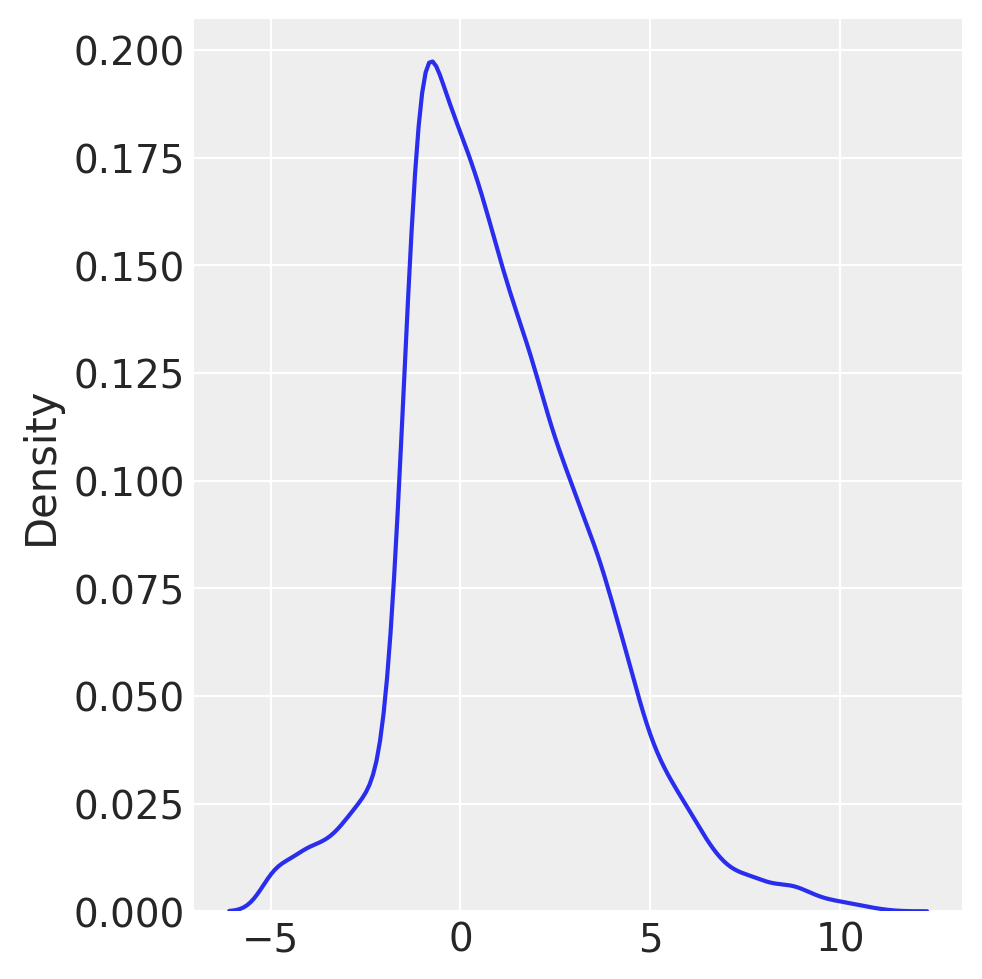

In [18]:
sns.displot(y, kind="kde")

### 5.2.2 ÂÆüË£ÖÊñπÊ≥ï (2)
* „Åì„Çå„ÅØ„ÄÅreparameterization„Çí‰Ωø„ÅÜ„Åì„Å®„ÅßÊîπËâØ„Åï„Çå„ÅüÂÆüË£Ö„ÄÇ
 * divergent transition„ÅØËµ∑„Åì„Çâ„Å™„ÅÑ„ÄÇ
 * $y$„ÅÆ„Çµ„É≥„Éó„É´„ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†„ÇÇÊ≠£Ë¶èÂàÜÂ∏É„ÅÆÂΩ¢„ÇíÁ§∫„Åô„ÄÇ

* ÂÖÉ„ÅÆ„É¢„Éá„É´„ÅØ
$$\begin{align} 
y & \sim N(0, 3^2) \\
x_i & \sim N(0, e^y), \text{ $i=1,\ldots, 9$ }  
\end{align}$$


* $x_i$„Çí$N(0, e^y)$„Åã„Çâ„Çµ„É≥„Éó„É™„É≥„Ç∞„Åô„Çã„ÄÅ„Å®„ÅÑ„ÅÜÂÆüË£Ö„Çí„ÇÑ„ÇÅ„Å¶„ÄÅ‰ª£„Çè„Çä„Å´
 * „Åæ„Åö$x_\text{raw}$„Çí$N(0,1)$„Åã„Çâ„Çµ„É≥„Éó„É™„É≥„Ç∞„Åó„Éª„Éª„Éª
 * „Åù„ÅÆ$x_\text{raw}$„Çí$x = e^{y/2} x_\text{raw}$„Å®„ÅÑ„ÅÜÂºè„ÅßÂ§âÊèõ„Åó„Å¶„ÅÑ„Çã„ÄÇ

In [19]:
with pm.Model() as model_revised:
  y = pm.Normal("y", mu=0, sd=3)
  x_raw = pm.Normal("x_raw", mu=0, sd=1, shape=9)
  x = pm.Deterministic("x", (y/2).exp() * x_raw)

In [20]:
with model_revised:
  trace_revised = pm.sample(2000, cores=4, random_seed=SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x_raw, y]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 15 seconds.


In [21]:
x0 = trace_revised['x'][:, 0]
y = trace_revised['y']
divergent = trace_revised['diverging']

In [22]:
divergent.sum()

0

Text(0.5, 1.0, 'scatter plot between y and x[0]')

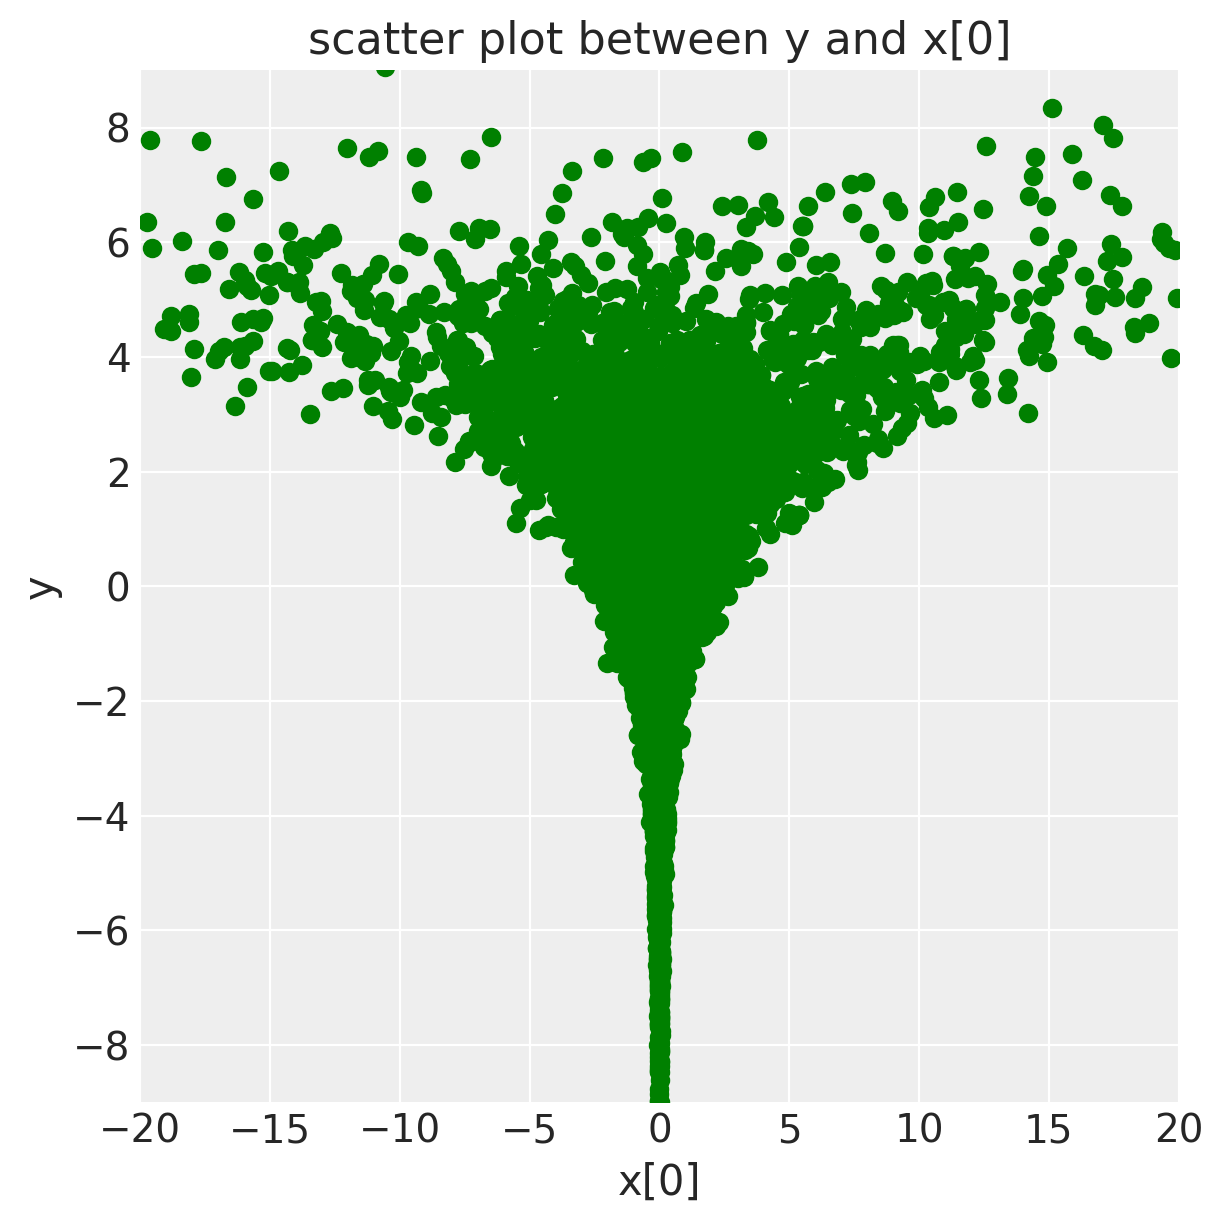

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(x0[~ divergent], y[~ divergent], color='g')
plt.scatter(x0[divergent], y[divergent], color='r')
plt.axis([-20, 20, -9, 9])
plt.ylabel('y')
plt.xlabel('x[0]')
plt.title('scatter plot between y and x[0]')

In [24]:
sns.displot(y, kind="kde")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


## 5.3 The Eight Schools Model
* ‰∏ãË®òWeb„Éö„Éº„Ç∏„Å´„ÅÇ„Çã„ÄåA Centered Eight Schools Implementation„Äç„ÅÆÂÆüÈ®ì„ÇíÂÜçÁèæ„Åó„Å¶„Åø„Çã„ÄÇ
 * https://pymc3.readthedocs.io/en/latest/notebooks/Diagnosing_biased_Inference_with_Divergences.html




> "Hamiltonian Monte Carlo, for example, is especially powerful in this regard as its failures to be geometrically ergodic with respect to any target distribution manifest in distinct behaviors that have been developed into sensitive diagnostics. One of these behaviors is the appearance of divergences that indicate the Hamiltonian Markov chain has encountered regions of high curvature in the target distribution which it cannot adequately explore." 
(https://pymc3.readthedocs.io/en/latest/notebooks/Diagnosing_biased_Inference_with_Divergences.html )



* arvizÂêë„Åë„Å´„Ç≥„Éº„Éâ„ÇíÊõ∏„ÅçÁõ¥„Åó„Åü„ÄÇ

### 5.5.1 „Éá„Éº„Çø„Çª„ÉÉ„Éà
* `y`„ÅåË¶≥Ê∏¨„Éá„Éº„Çø
* `sigma`„ÅåÊó¢Áü•„ÅÆ„Éë„É©„É°„Éº„Çø

In [25]:
# Data of the Eight Schools Model
y = np.asarray([28,  8, -3,  7, -1,  1, 18, 12], dtype=float)
sigma = np.asarray([15, 10, 16, 11,  9, 11, 10, 18], dtype=float)
J = y.shape[0]

* „Åì„ÅÆ„Éá„Éº„Çø„Çí‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´„É¢„Éá„É™„É≥„Ç∞„Åô„Çã„ÄÇ
$$\begin{align}
\mu & \sim N(0,5) \notag \\
\tau & \sim \text{Half-Cauchy}(5) \\
\theta_n & \sim N(\mu, \tau) \\
y_n & \sim N(\theta_n, \sigma_n^2)
\end{align}$$
 * $y_n$„Åå‰∏äË®ò„Ç≥„Éº„Éâ„ÅÆ`y`„Å´ÂØæÂøú„Åô„Çã„ÄÇ
 * $\sigma_n$„Åå‰∏äË®ò„Ç≥„Éº„Éâ„ÅÆ`sigma`„Å´ÂØæÂøú„Åô„Çã„ÄÇ

* Half-cauchyÂàÜÂ∏É„Å´„Å§„ÅÑ„Å¶„ÅØ‰∏ãË®ò„Éö„Éº„Ç∏„ÇíÂèÇÁÖß
 * https://distribution-explorer.github.io/continuous/halfcauchy.html
> "The Half-Cauchy distribution with ùúá=0 is a useful prior for nonnegative parameters that may be very large, as allowed by the very heavy tails of the Half-Cauchy distribution."

### 5.5.2 ÂÆüË£ÖÊñπÊ≥ï(1)
* „Åì„Çå„ÅØËâØ„Åè„Å™„ÅÑÂÆüË£ÖÊñπÊ≥ï„ÄÇ
 * reparameterization„Çí‰Ωø„Å£„Å¶Âæå„ÅßÊîπËâØ„Åô„Çã„ÄÇ

In [26]:
with pm.Model() as Centered_eight:
  mu = pm.Normal('mu', mu=0, sd=5)
  tau = pm.HalfCauchy('tau', beta=5)
  theta = pm.Normal('theta', mu=mu, sd=tau, shape=J)
  obs = pm.Normal('obs', mu=theta, sd=sigma, observed=y)

* `return_inferencedata=True`„Å®„Åó„Å¶arvizÂêë„Åë„ÅÆ„Çµ„É≥„Éó„É™„É≥„Ç∞ÁµêÊûú„Éá„Éº„Çø„ÇíÂæó„Çã„ÄÇ„ÄÄ

In [27]:
with Centered_eight:
  trace = pm.sample(2000, cores=4, random_seed=SEED, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, tau, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 27 seconds.
There were 54 divergences after tuning. Increase `target_accept` or reparameterize.
There were 37 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6370223215883811, but should be close to 0.8. Try to increase the number of tuning steps.
There were 59 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6144847592132275, but should be close to 0.8. Try to increase the number of tuning steps.
There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [28]:
az.summary(trace)

mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
mu        4.143  3.376  -1.779   10.714  ...    0.105     526.0    1005.0   1.02
theta[0]  6.268  6.086  -4.308   17.987  ...    0.139     719.0    2413.0   1.01
theta[1]  4.753  4.943  -3.981   14.710  ...    0.112     896.0    2798.0   1.00
theta[2]  3.616  5.531  -6.848   14.255  ...    0.108    1082.0    2203.0   1.01
theta[3]  4.604  5.057  -4.581   14.594  ...    0.106     997.0    2552.0   1.01
theta[4]  3.235  4.871  -5.998   12.282  ...    0.109     904.0    1894.0   1.01
theta[5]  3.819  5.069  -5.292   14.069  ...    0.105    1037.0    1941.0   1.01
theta[6]  6.325  5.399  -3.717   16.512  ...    0.139     655.0     895.0   1.01
theta[7]  4.660  5.569  -5.413   15.749  ...    0.096    1312.0    2548.0   1.01
tau       4.223  3.121   0.963    9.809  ...    0.104     181.0     113.0   1.02

[10 rows x 9 columns]

* `r_hat`„ÅØ1.0„Å´Ëøë„ÅÑ„ÅÆ„ÅßÂïèÈ°å„Å™„Åï„Åù„ÅÜ„ÄÇ

In [29]:
pm.traceplot(trace, var_names=['tau'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20f42cc790>,
      dtype=object)

* „Åì„ÅÆ„Éá„Éº„Çø„Å´„Å§„ÅÑ„Å¶„ÅØ$\tau$„ÅÆÁúü„ÅÆÂÄ§„ÅåÂàÜ„Åã„Å£„Å¶„ÅÑ„Çã„Çâ„Åó„ÅÑ„ÄÇ
 * Ë©≥Á¥∞„ÅØ„Çà„ÅèÁü•„Çä„Åæ„Åõ„Çì„ÄÇÔºà„Åô„ÅÑ„Åæ„Åõ„Çì„ÄÇÔºâ
* log„Çπ„Ç±„Éº„É´„Åß„Éó„É≠„ÉÉ„Éà„Åó„Å¶„ÄÅÁúü„ÅÆÂÄ§„Åã„Çâ„ÅÆ„Ç∫„É¨„ÇíË¶ã„Å¶„Åø„Çã„ÄÇ
 * $\log \tau$„ÅÆÁúü„ÅÆÂÄ§„ÅØ0.7657852„Çâ„Åó„ÅÑ„Åß„Åô„ÄÇ

Text(0.5, 1.0, 'MCMC estimation of log(tau)')

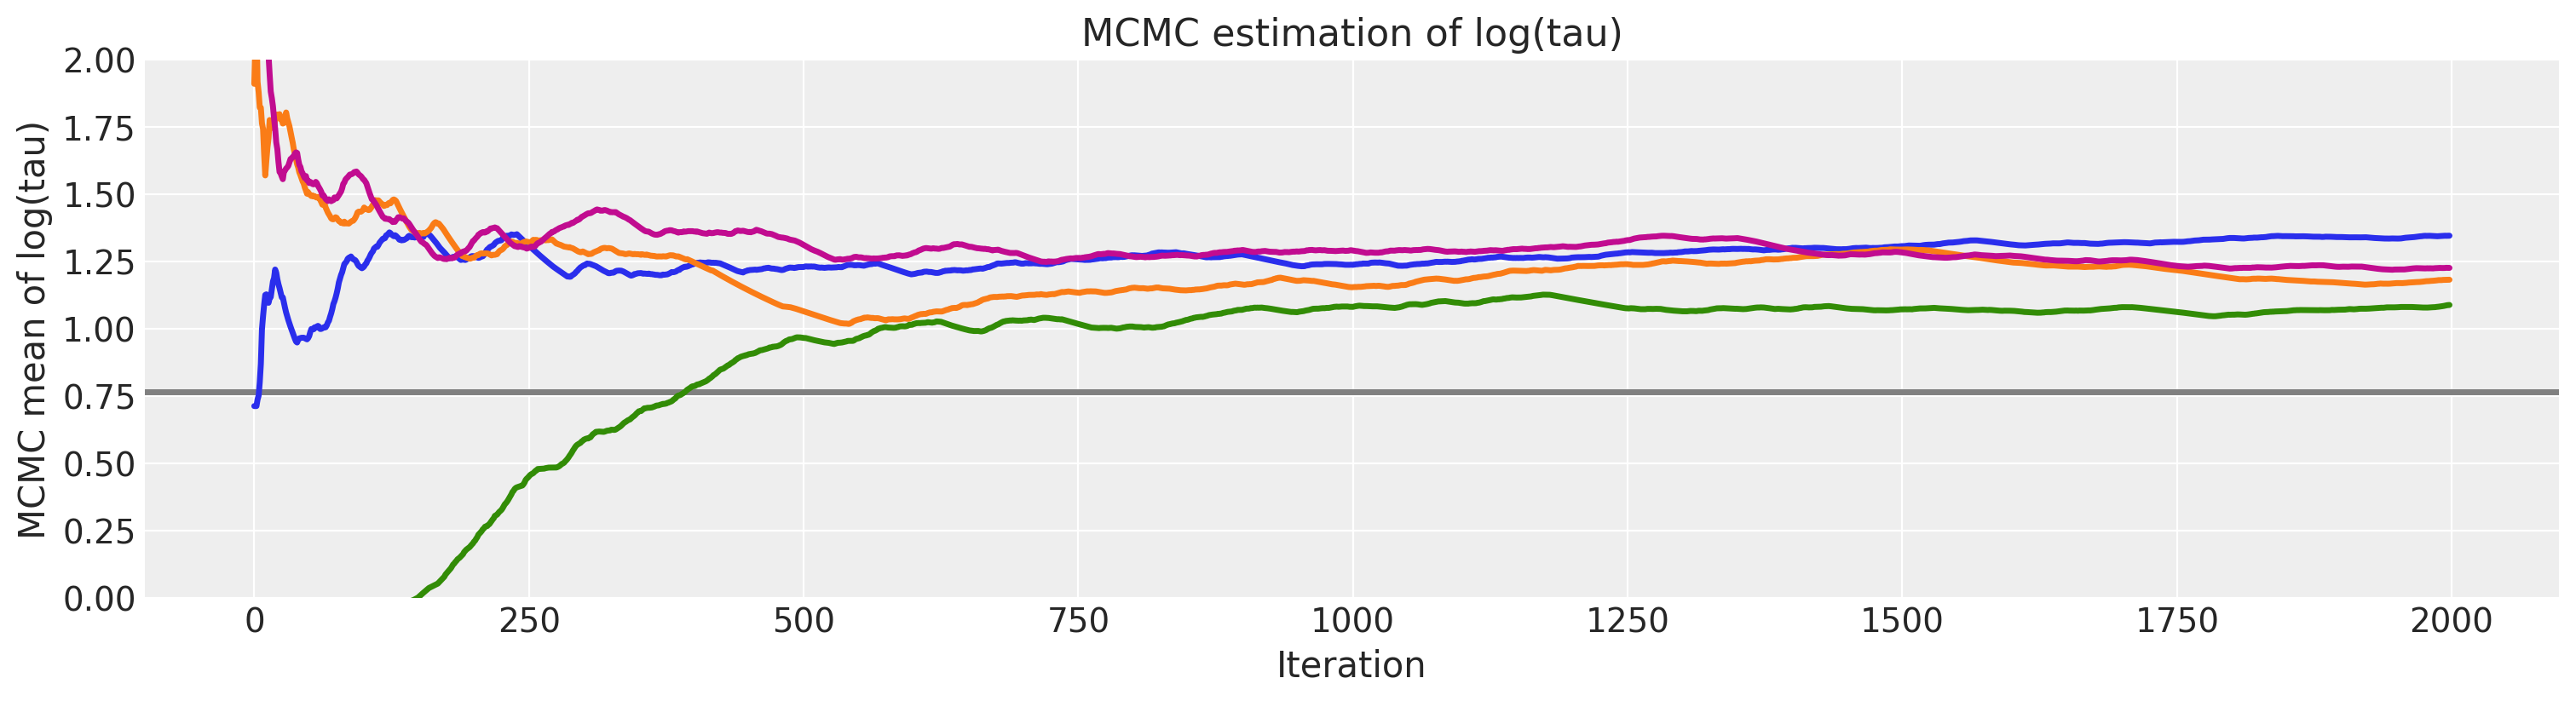

In [30]:
logtau = np.log(trace.posterior['tau'].data)
plt.figure(figsize=(15, 4))
plt.axhline(0.7657852, lw=2.5, color='gray')
for j in range(logtau.shape[0]):
  mlogtau = [np.mean(logtau[j,:i]) for i in np.arange(1, len(logtau[j]))]
  plt.plot(mlogtau, lw=2.5)
plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of log(tau)')
plt.title('MCMC estimation of log(tau)')

In [31]:
trace.sample_stats

<xarray.Dataset>
Dimensions:             (chain: 4, draw: 2000)
Coordinates:
  * chain               (chain) int64 0 1 2 3
  * draw                (draw) int64 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999
Data variables: (12/13)
    diverging           (chain, draw) bool False False False ... False False
    perf_counter_diff   (chain, draw) float64 0.002474 0.002599 ... 0.004568
    step_size_bar       (chain, draw) float64 0.301 0.301 ... 0.3433 0.3433
    perf_counter_start  (chain, draw) float64 257.4 257.4 257.4 ... 273.8 273.8
    energy              (chain, draw) float64 54.78 55.16 57.46 ... 59.05 58.27
    energy_error        (chain, draw) float64 0.0 0.0 0.0 ... -0.3642 0.08066
    ...                  ...
    step_size           (chain, draw) float64 0.1919 0.1919 ... 0.4296 0.4296
    acceptance_rate     (chain, draw) float64 0.1813 0.04889 ... 0.9698 0.9183
    n_steps             (chain, draw) float64 7.0 7.0 3.0 11.0 ... 7.0 7.0 15.0
    tree_depth          (chain, draw) int64 3 3 2 4 2 4 3 3 ... 4 3 3 3 3 3 3 4
    process_time_diff   (chain, draw) float64 0.002475 0.0026 ... 0.00457
    max_energy_error    (chain, draw) float64 6.811 65.73 18.7 ... -0.3642 29.28
Attributes:
    created_at:                 2021-05-16T14:02:17.068591
    arviz_version:              0.11.2
    inference_library:          pymc3
    inference_library_version:  3.11.2
    sampling_time:              27.25101637840271
    tuning_steps:               1000

In [32]:
trace.sample_stats.diverging

<xarray.DataArray 'diverging' (chain: 4, draw: 2000)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999

In [33]:
chain_id = 0
divergent = trace.sample_stats.diverging.data[chain_id]

In [34]:
theta_trace = trace.posterior['theta'][chain_id]
theta0 = theta_trace[:,0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[~divergent], logtau[chain_id][~divergent], color='g')
plt.scatter(theta0[divergent], logtau[chain_id][divergent], color='r')
plt.axis([-20, 50, -6, 4])
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')

Text(0.5, 1.0, 'scatter plot between log(tau) and theta[0]')

Text(0.5, 1.0, 'scatter plot between log(tau) and theta[0]')

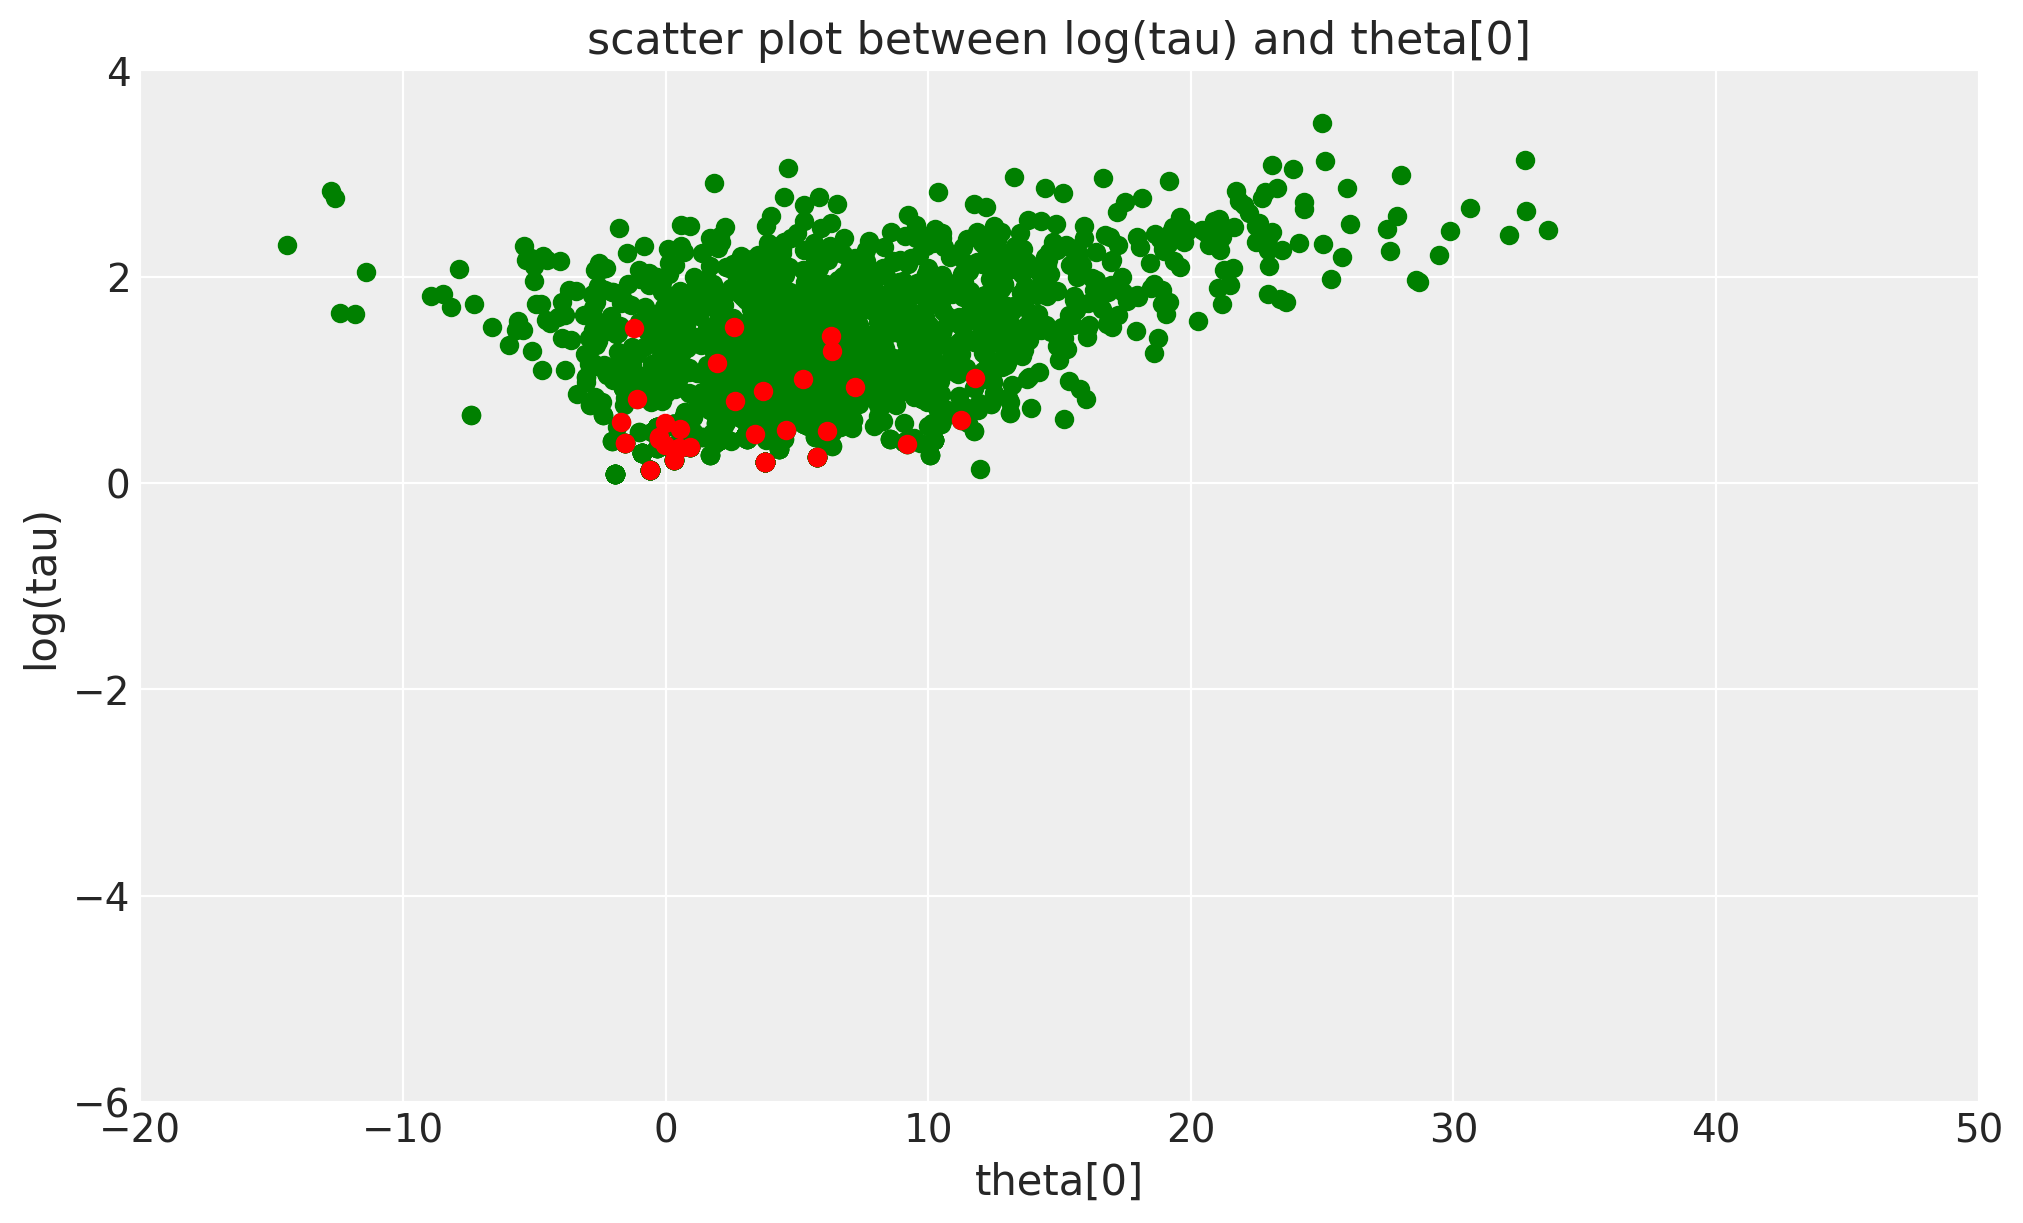

In [35]:
chain_id = 1
divergent = trace.sample_stats.diverging.data[chain_id]
theta_trace = trace.posterior['theta'][chain_id]
theta0 = theta_trace[:,0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[~divergent], logtau[chain_id][~divergent], color='g')
plt.scatter(theta0[divergent], logtau[chain_id][divergent], color='r')
plt.axis([-20, 50, -6, 4])
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')

### 5.5.3 ÂÆüË£ÖÊñπÊ≥ï(2)
* reparameterization„Çí‰Ωø„ÅÜ„ÄÇ

In [36]:
with pm.Model() as NonCentered_eight:
  mu = pm.Normal('mu', mu=0, sd=5)
  tau = pm.HalfCauchy('tau', beta=5)
  theta_tilde = pm.Normal('theta_t', mu=0, sd=1, shape=J)
  theta = pm.Deterministic('theta', mu + tau * theta_tilde) # „Åì„Åì„Åßreparameterization„Çí‰ΩøÁî®
  obs = pm.Normal('obs', mu=theta, sd=sigma, observed=y)

In [37]:
with NonCentered_eight:
  trace = pm.sample(2000, cores=4, random_seed=SEED, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_t, tau, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 21 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


In [38]:
az.summary(trace)

mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
mu          4.357  3.353  -2.070   10.543  ...    0.031    6827.0    4212.0    1.0
theta_t[0]  0.315  0.999  -1.531    2.180  ...    0.011    8035.0    5507.0    1.0
theta_t[1]  0.096  0.943  -1.703    1.821  ...    0.011    8110.0    4925.0    1.0
theta_t[2] -0.083  0.976  -1.957    1.739  ...    0.011    8717.0    5723.0    1.0
theta_t[3]  0.062  0.942  -1.766    1.760  ...    0.012    9351.0    5906.0    1.0
theta_t[4] -0.144  0.953  -1.958    1.628  ...    0.011    9784.0    5415.0    1.0
theta_t[5] -0.065  0.922  -1.773    1.703  ...    0.011    8801.0    5455.0    1.0
theta_t[6]  0.380  0.953  -1.468    2.065  ...    0.011    8417.0    5399.0    1.0
theta_t[7]  0.080  0.980  -1.682    2.047  ...    0.012    9089.0    5451.0    1.0
tau         3.646  3.161   0.001    9.339  ...    0.038    4010.0    3586.0    1.0
theta[0]    6.168  5.675  -3.166   18.410  ...    0.055    6788.0    4912.0    1.0
theta[1]    4.901  4.722  -3.731   13.963  ...    0.043    7471.0    5359.0    1.0
theta[2]    3.869  5.353  -5.766   14.539  ...    0.054    6355.0    4720.0    1.0
theta[3]    4.779  4.813  -4.937   13.471  ...    0.043    7791.0    5672.0    1.0
theta[4]    3.635  4.747  -5.164   12.938  ...    0.045    7365.0    5736.0    1.0
theta[5]    4.013  4.791  -5.432   12.754  ...    0.045    7735.0    5371.0    1.0
theta[6]    6.317  5.024  -2.670   16.205  ...    0.053    7228.0    4870.0    1.0
theta[7]    4.948  5.468  -5.266   15.014  ...    0.071    6741.0    4442.0    1.0

[18 rows x 9 columns]

In [39]:
pm.traceplot(trace, var_names=['tau'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f210a429c10>,
      dtype=object)

Text(0.5, 1.0, 'MCMC estimation of log(tau)')

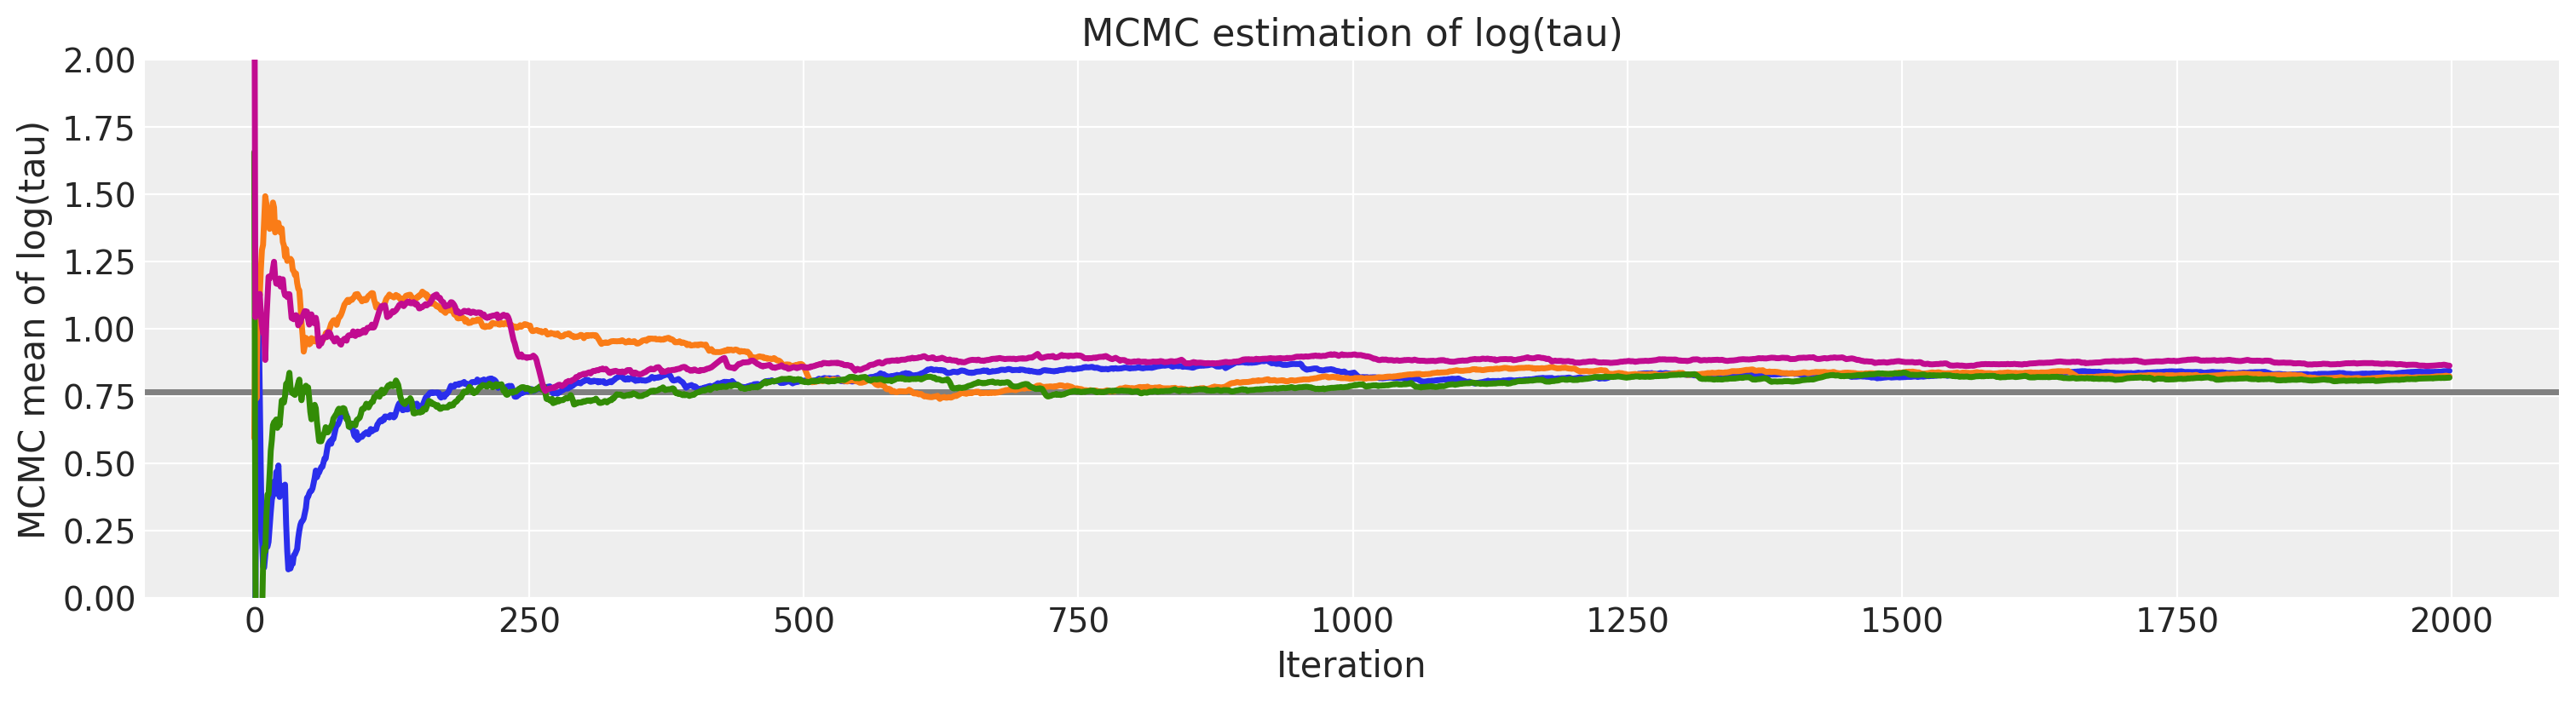

In [40]:
logtau = np.log(trace.posterior['tau'].data)
plt.figure(figsize=(15, 4))
plt.axhline(0.7657852, lw=2.5, color='gray')
for j in range(logtau.shape[0]):
  mlogtau = [np.mean(logtau[j,:i]) for i in np.arange(1, len(logtau[j]))]
  plt.plot(mlogtau, lw=2.5)
plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of log(tau)')
plt.title('MCMC estimation of log(tau)')

Text(0.5, 1.0, 'scatter plot between log(tau) and theta[0]')

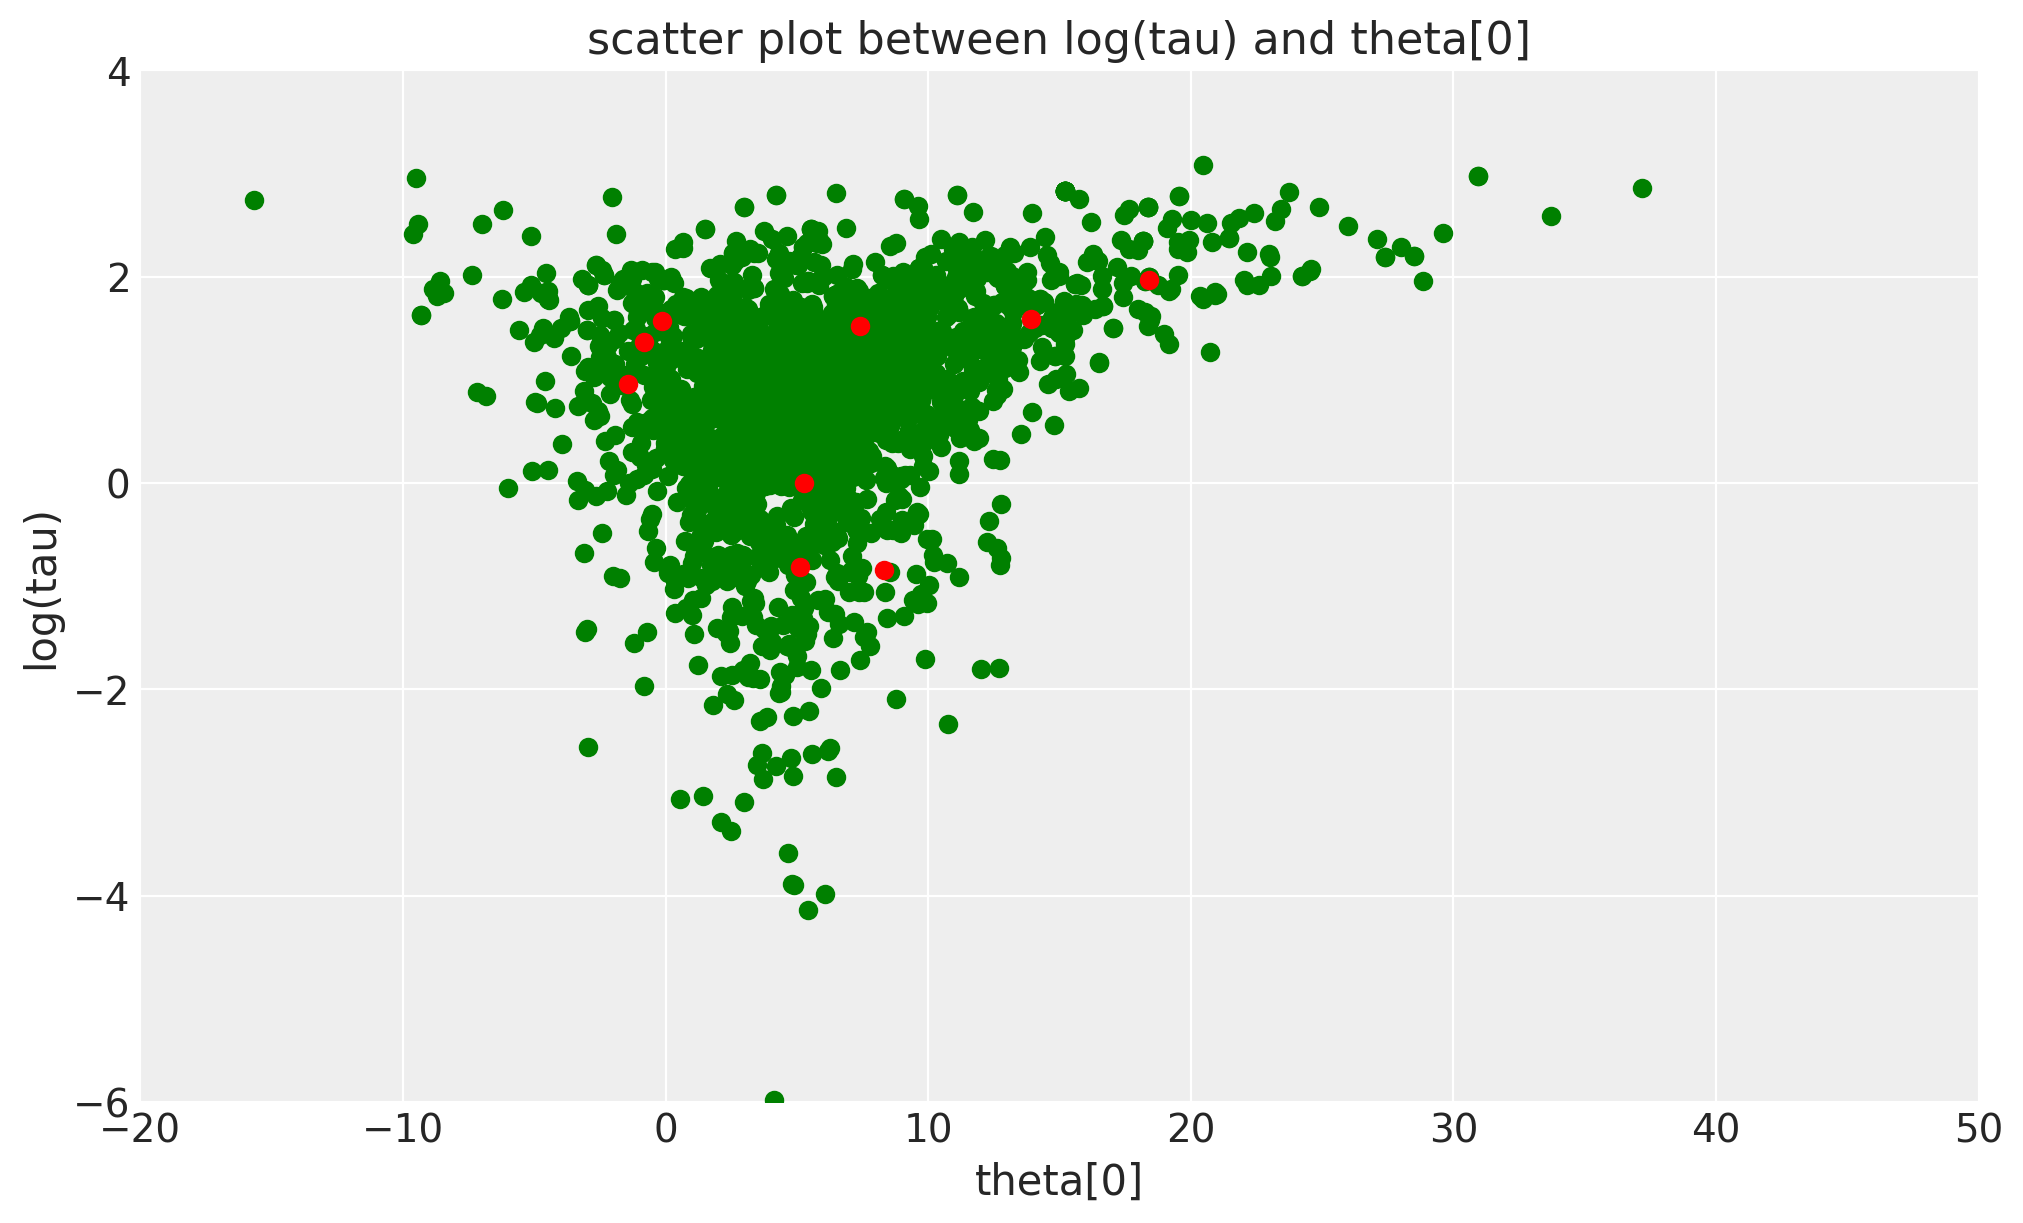

In [41]:
chain_id = 0
divergent = trace.sample_stats.diverging.data[chain_id]
theta_trace = trace.posterior['theta'][chain_id]
theta0 = theta_trace[:,0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[~divergent], logtau[chain_id][~divergent], color='g')
plt.scatter(theta0[divergent], logtau[chain_id][divergent], color='r')
plt.axis([-20, 50, -6, 4])
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')

Text(0.5, 1.0, 'scatter plot between log(tau) and theta[0]')

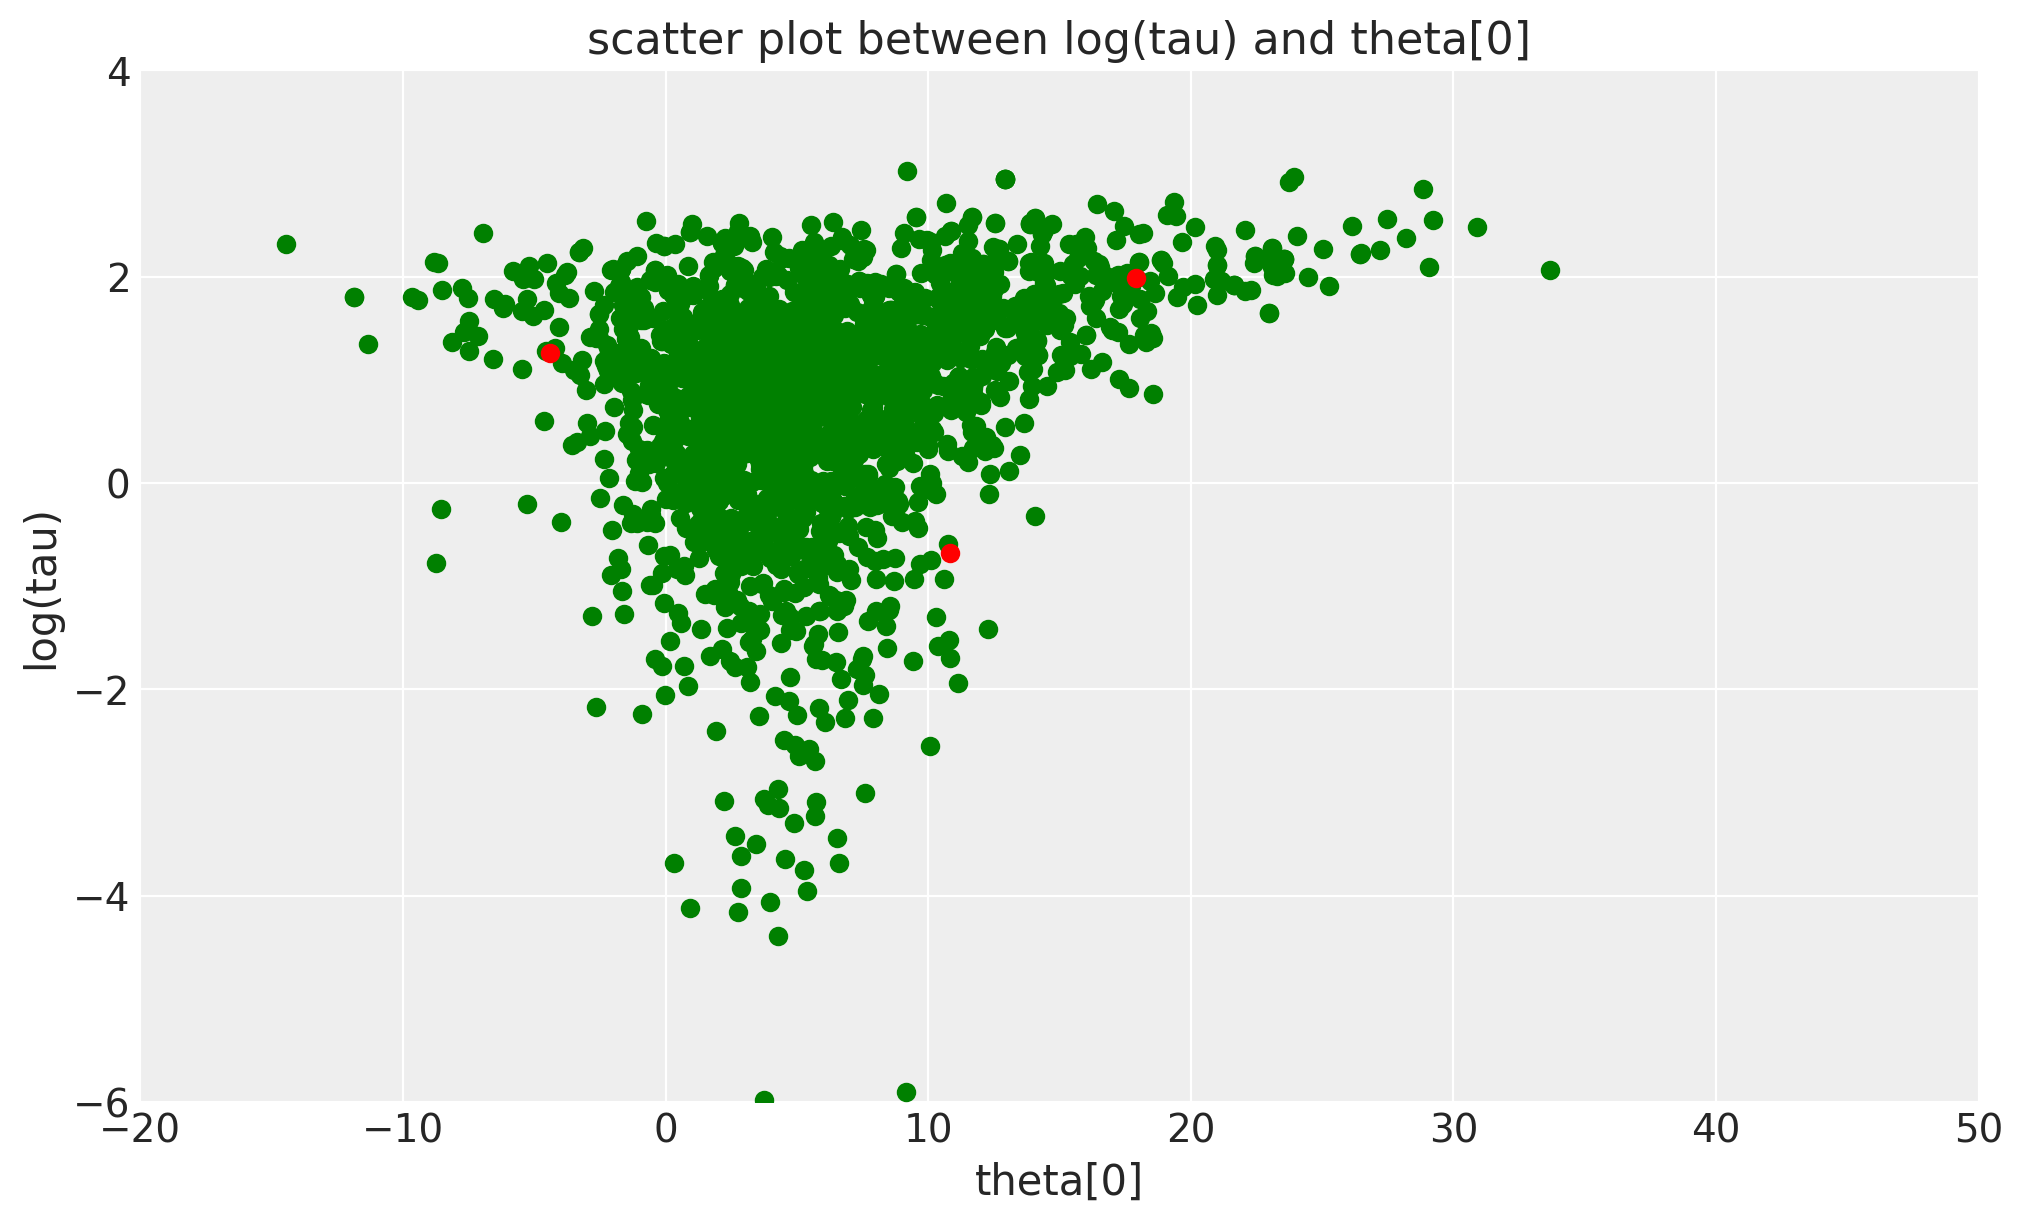

In [42]:
chain_id = 1
divergent = trace.sample_stats.diverging.data[chain_id]
theta_trace = trace.posterior['theta'][chain_id]
theta0 = theta_trace[:,0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[~divergent], logtau[chain_id][~divergent], color='g')
plt.scatter(theta0[divergent], logtau[chain_id][divergent], color='r')
plt.axis([-20, 50, -6, 4])
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')

### 5.5.4 Êé°ÊäûÁéá(acceptance rate)„ÇíË™øÊï¥„Åô„Çã

> "target_accept : float in [0, 1]. The step size is tuned such that we approximate this acceptance rate. Higher values like 0.9 or 0.95 often work better for problematic posteriors." (https://docs.pymc.io/api/inference.html ) 


In [43]:
with NonCentered_eight:
  step = pm.NUTS(target_accept=.90)
  trace = pm.sample(2000, step=step, cores=4, random_seed=SEED, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_t, tau, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


In [44]:
with NonCentered_eight:
  step = pm.NUTS(target_accept=.95)
  trace = pm.sample(2000, step=step, cores=4, random_seed=SEED, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_t, tau, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.


In [45]:
with NonCentered_eight:
  step = pm.NUTS(target_accept=1.0)
  trace = pm.sample(2000, step=step, cores=4, random_seed=SEED, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_t, tau, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 76 seconds.
The acceptance probability does not match the target. It is 0.9971561924606606, but should be close to 1.0. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.997538534045532, but should be close to 1.0. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9974665769038705, but should be close to 1.0. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9973181529137137, but should be close to 1.0. Try to increase the number of tuning steps.


Text(0.5, 1.0, 'MCMC estimation of log(tau)')

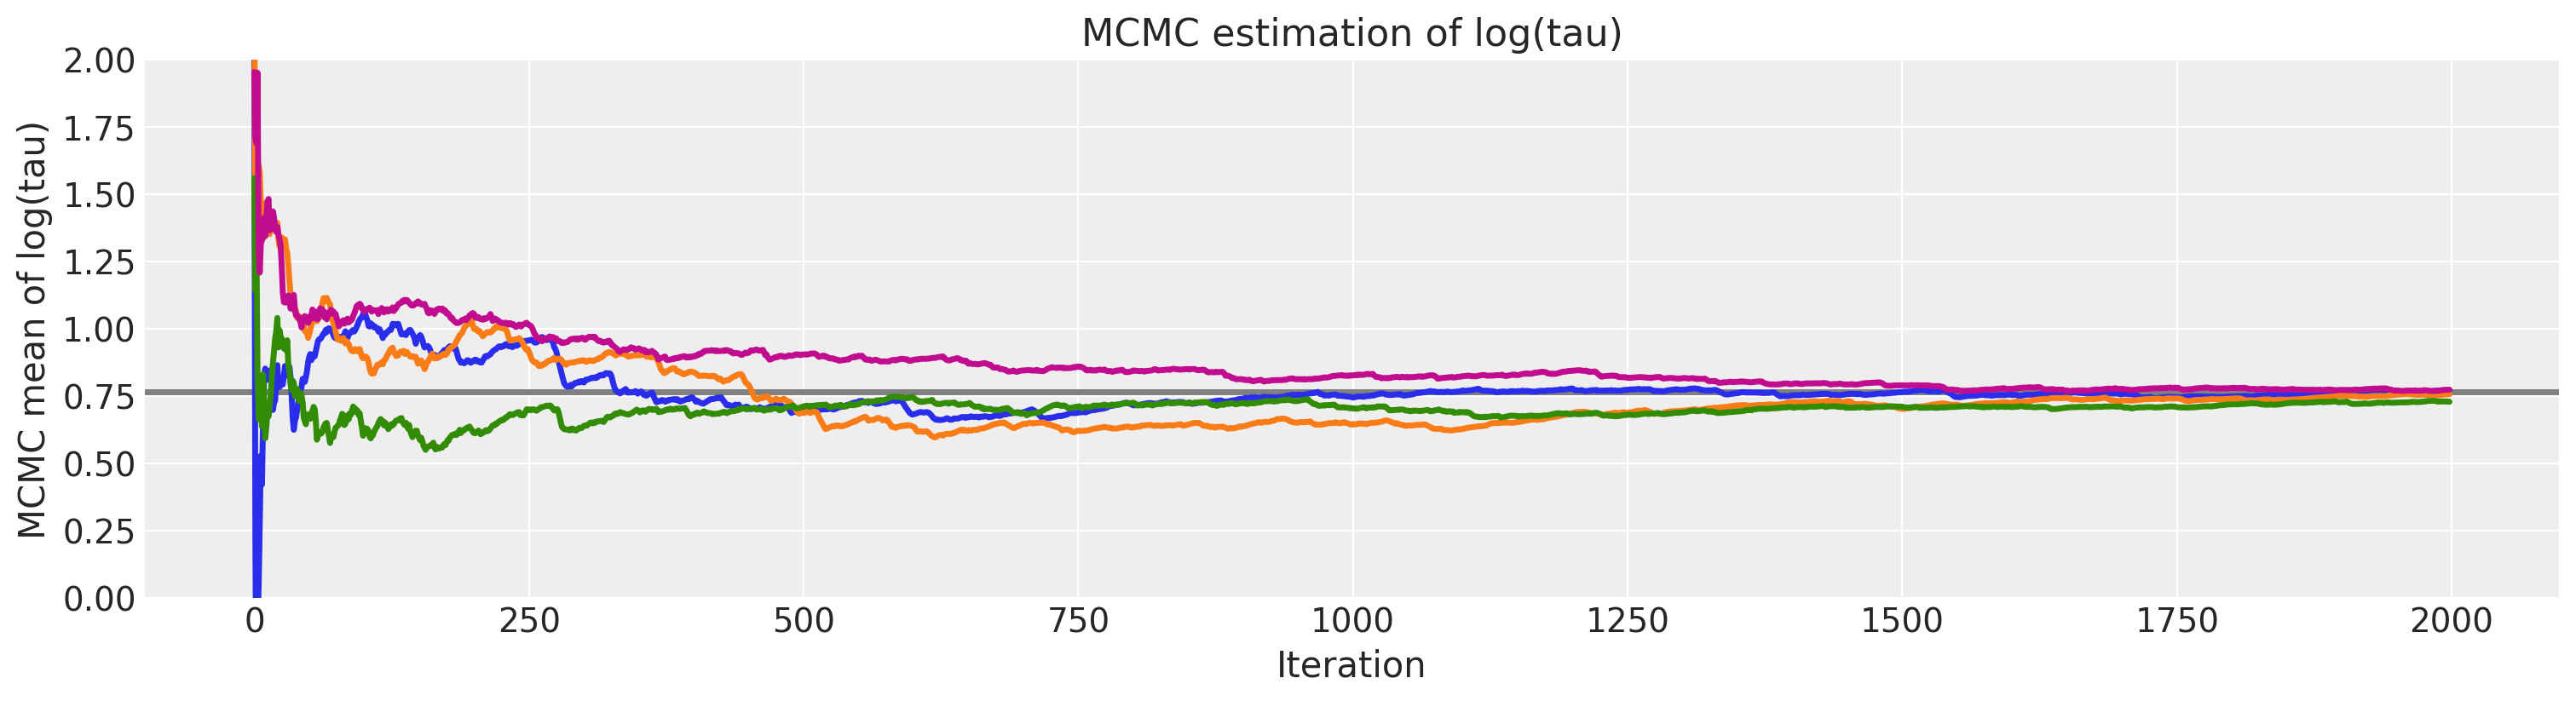

In [46]:
logtau = np.log(trace.posterior['tau'].data)
plt.figure(figsize=(15, 4))
plt.axhline(0.7657852, lw=2.5, color='gray')
for j in range(logtau.shape[0]):
  mlogtau = [np.mean(logtau[j,:i]) for i in np.arange(1, len(logtau[j]))]
  plt.plot(mlogtau, lw=2.5)
plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of log(tau)')
plt.title('MCMC estimation of log(tau)')